In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [169]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [170]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [171]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3242,ham,Pls accept me for one day. Or am begging you c...,NaN,NaN,NaN
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...,NaN,NaN,NaN
2668,spam,Wanna get laid 2nite? Want real Dogging locati...,NaN,NaN,NaN
1411,ham,somewhere out there beneath the pale moon ligh...,NaN,NaN,NaN
5519,ham,Can you pls send me that company name. In saib...,NaN,NaN,NaN


In [172]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [173]:
df.sample(5)

,v1,v2
3636,ham,You know what hook up means right?
4394,ham,"Only just got this message, not ignoring you. ..."
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...
527,ham,Yes! How is a pretty lady like you single?
1039,ham,They just talking thats it de. They wont any o...


In [174]:
df.shape

(5572, 2)

In [175]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [176]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

403


In [177]:
df.shape

(5169, 2)

In [178]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

##### 1. EDA
##### 2. Text Preprocessing
##### 3. Model building
##### 4. Evaluation
##### 5. Improvement

### 1. EDA

In [179]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [181]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='target'>

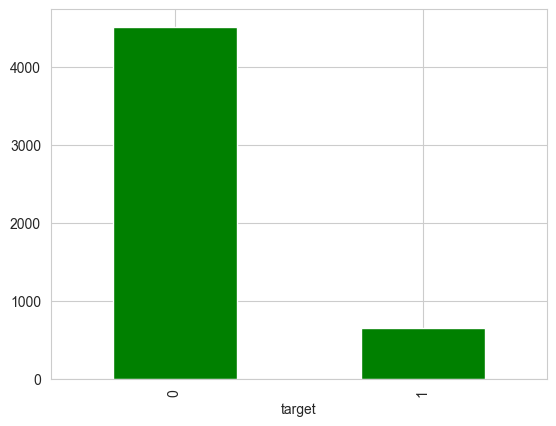

In [183]:
# Visualising the target column using bar plot

df.groupby('target').count().plot(kind='bar', legend=False, color='green')

array([<Axes: ylabel='text'>], dtype=object)

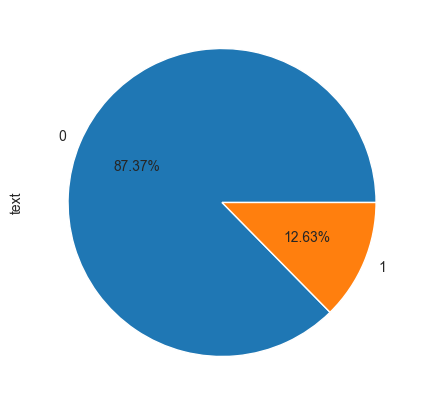

In [184]:
# Visualising the target column using bar plot
df.groupby('target').count().plot(kind='pie', subplots=True, legend=False, autopct='%.2f%%', figsize=(10, 5))

In [185]:
!pip3 install nltk wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [186]:
# It must be an imbalanced dataset as the number of spam messages are less than the number of ham messages

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rounaksarkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [187]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [188]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [189]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [190]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

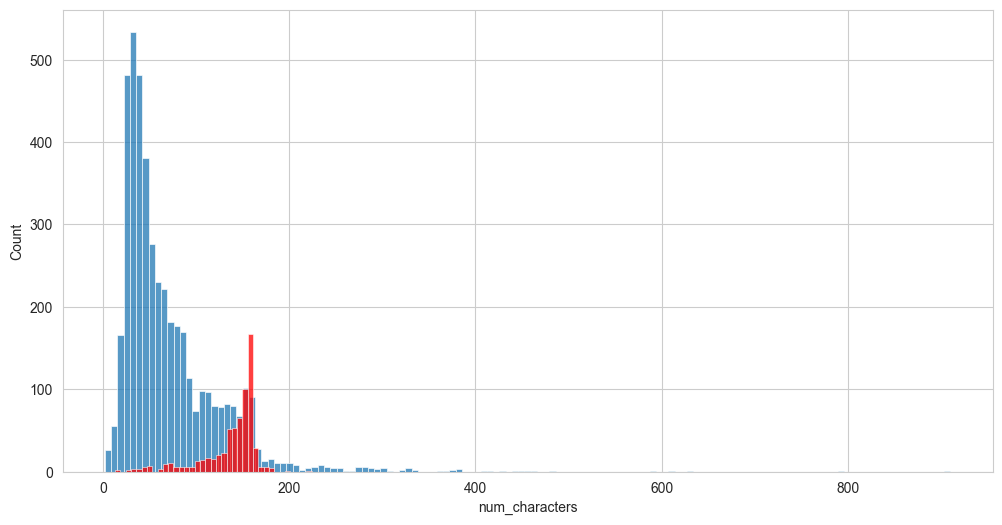

In [191]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

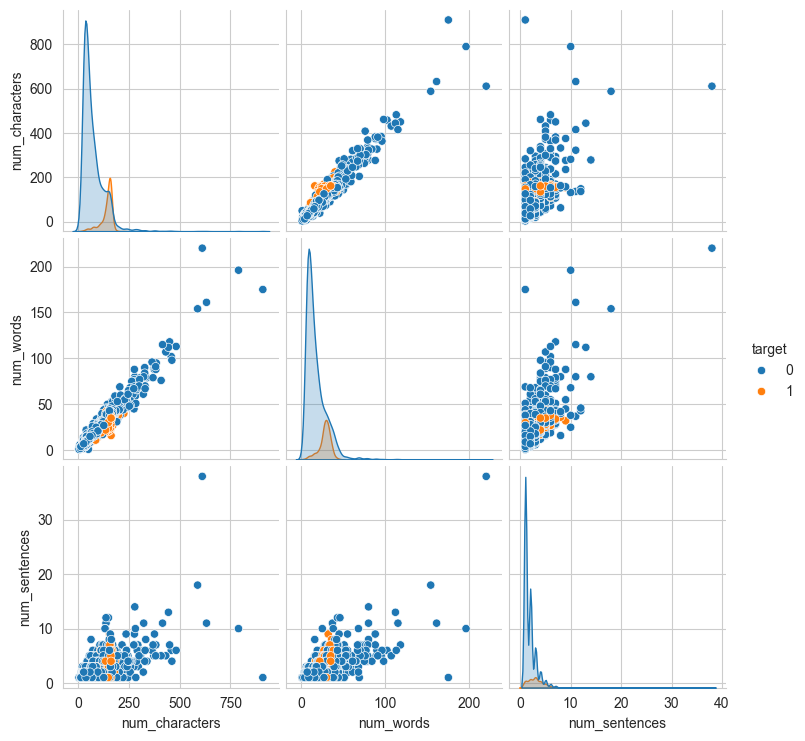

In [192]:
sns.pairplot(df,hue='target')

<Axes: >

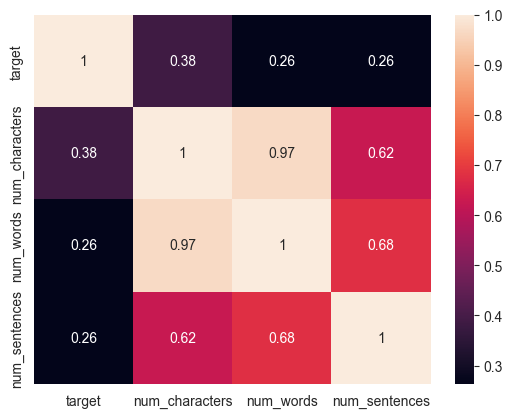

In [193]:
# sns.heatmap(df.corr(),annot=True)
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True)

### 2. Data Preprocessing

In [194]:
import nltk
from nltk.corpus import stopwords
import string
# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rounaksarkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [196]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [197]:
df['transformed_text'] = df['text'].apply(transform_text)

In [198]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [199]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [200]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

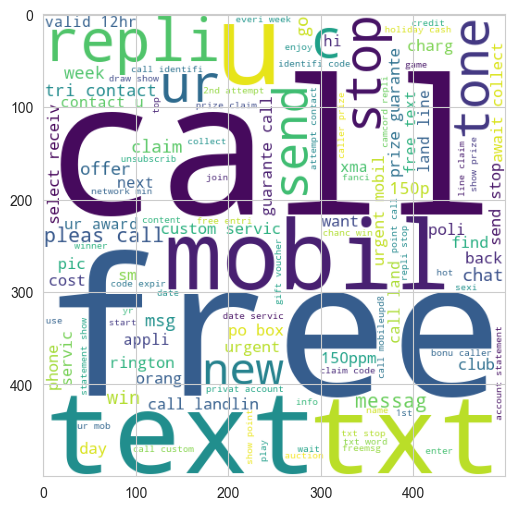

In [201]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [202]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

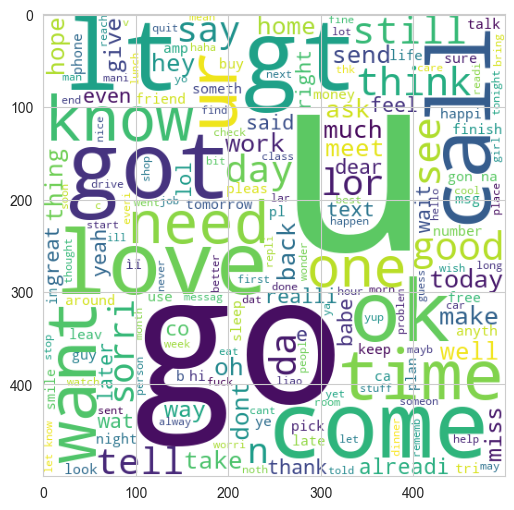

In [203]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [204]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

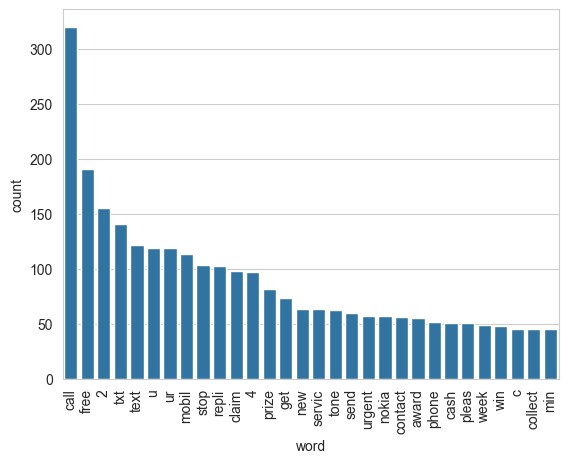

In [205]:
# Assuming spam_corpus is a list of words or tokens
from collections import Counter
counter = Counter(spam_corpus)
most_common_words = counter.most_common(30)
spam_counts = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Use keyword arguments for x and y
sns.barplot(x='word', y='count', data=spam_counts)
plt.xticks(rotation='vertical')
plt.show()

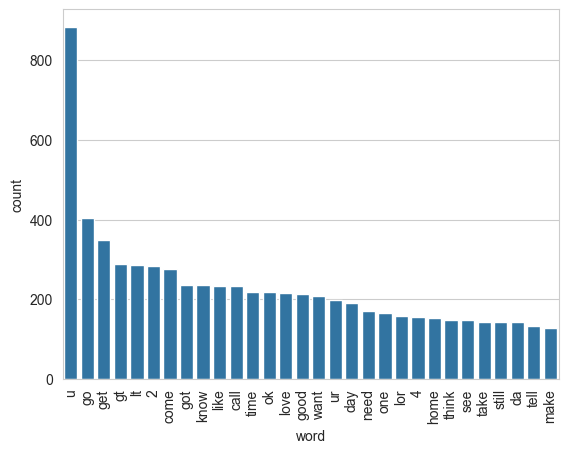

In [206]:
# Assuming ham_corpus is a list of words or tokens
from collections import Counter
counter = Counter(ham_corpus)
most_common_words = counter.most_common(30)
ham_corpus = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Use keyword arguments for x and y
sns.barplot(x='word', y='count', data=ham_corpus)
plt.xticks(rotation='vertical')
plt.show()

### 3. Model building

In [207]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [208]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [209]:
y = df['target'].values

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [211]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [212]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [213]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[771 114]
 [ 23 126]]
0.525


In [214]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[885   0]
 [ 33 116]]
1.0


In [215]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[884   1]
 [ 25 124]]
0.992


In [216]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [98]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (heroku/brew, homebrew/core and homebrew/cask).
==> New Formulae
clang-uml    frizbee      kaskade      nerdfetch    ryelang      terrahash
cortexso     ftnchek      libgit2@1.7  openbao      soapyhackrf  terramaid
cotila       iowow        litmusctl    pug          tdb          wcurl
==> New Casks
avbeam                                   kando
blip                                     longplay
boosteroid                               monarch
crashplan                                notchnook
dockdoor                                 replit
duplicateaudiofinder                     roblox
font-sixtyfour-convergence               sq-mixpad
geoda                                    teamspeak-client@beta
gitkraken-on-premise-serverless          treeviewer
ivacy 

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [218]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [219]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [220]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [221]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9767441860465116)

In [222]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9767441860465116
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8532110091743119
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9739130434782609
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0


/Users/rounaksarkar/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.967741935483871
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8741258741258742
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9923076923076923
For  GBDT
Accuracy -  0.9555125725338491
Precision -  0.963963963963964
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9761904761904762


In [223]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.968085,1.000000
5,RF,0.977756,1.000000
8,ETC,0.979691,0.992308
0,SVC,0.974855,0.976744
10,xgb,0.971954,0.976190
4,LR,0.961315,0.973913
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
7,BgC,0.959381,0.874126


In [224]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.968085
2,RF,Accuracy,0.977756
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.974855
5,xgb,Accuracy,0.971954
6,LR,Accuracy,0.961315
7,AdaBoost,Accuracy,0.968085
8,GBDT,Accuracy,0.955513
9,BgC,Accuracy,0.959381


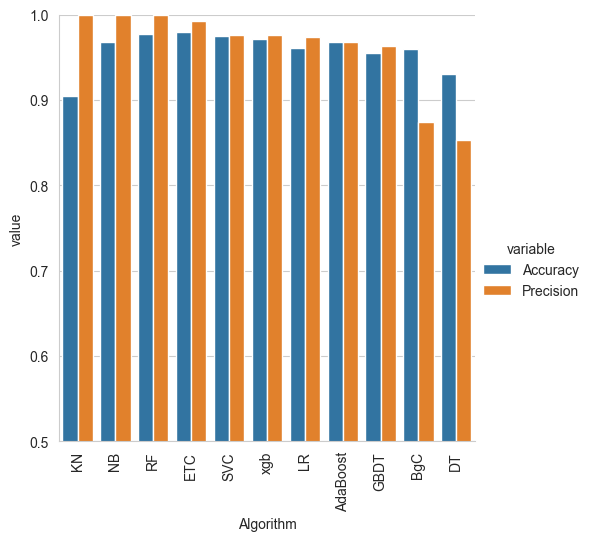

In [225]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 5. Model Improvement

In [226]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [227]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,
                        'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [228]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [229]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [230]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,
                        'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [231]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.979691,0.992308,0.979691,0.992308,0.979691,0.992308,0.979691,0.992308
4,SVC,0.974855,0.976744,0.974855,0.976744,0.974855,0.976744,0.974855,0.976744
5,xgb,0.971954,0.976190,0.971954,0.976190,0.971954,0.976190,0.971954,0.976190
6,LR,0.961315,0.973913,0.961315,0.973913,0.961315,0.973913,0.961315,0.973913
7,AdaBoost,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742
8,GBDT,0.955513,0.963964,0.955513,0.963964,0.955513,0.963964,0.955513,0.963964
9,BgC,0.959381,0.874126,0.959381,0.874126,0.959381,0.874126,0.959381,0.874126


In [232]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [233]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [234]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [235]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9924242424242424


In [236]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [237]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9851851851851852


Hence we got approximately 98% accuracy with the above model.